In [3]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pl.read_csv('https://github.com/dustywhite7/Econ8310/raw/master/AssignmentData/Assignment1/honey_production_data_2015.csv')
data = data.select(['year', 'avg_price_pound'])

In [18]:
data

year,avg_price_pound
i64,f64
2000,0.6
2001,0.7
2002,1.29
2003,1.39
2004,1.09
2005,0.92
2006,1.04
2007,1.08
2008,1.41


<AxesSubplot: xlabel='year', ylabel='avg_price_pound'>

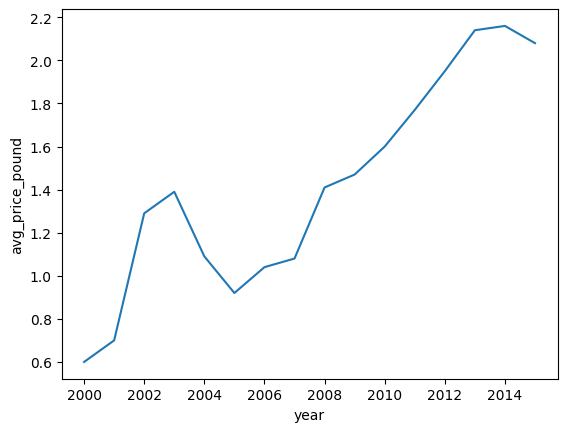

In [22]:
sns.lineplot(data=data, x='year', y='avg_price_pound')